In [34]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [10]:
contract = pd.read_csv('final_provider/final_provider/contract.csv')
internet = pd.read_csv('final_provider/final_provider/internet.csv')
personal = pd.read_csv('final_provider/final_provider/personal.csv')
phone= pd.read_csv('final_provider/final_provider/phone.csv')

Observare como estan estructurados los dataframes

In [12]:
display(contract.shape, internet.shape, personal.shape, phone.shape)
display(contract.head())


(7043, 8)

(5517, 8)

(7043, 5)

(6361, 2)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Ahora checare los datos nulos y duplicados

In [79]:
for df, name in zip([contract, personal, internet, phone], ['contract', 'personal', 'internet', 'phone']):
    print(f"\n--- {name} ---")
    print(df.info())
    print(df.isnull().sum())
    print(df.duplicated().sum())


--- contract ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   YearMonth         7043 non-null   period[M]     
 9   EndDate_status    7043 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[M](1)
memory usage: 550.4+ KB
None
customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMet

Observare las estadisticas iniciales

In [19]:
display(contract.head().describe)

<bound method NDFrame.describe of    customerID  BeginDate              EndDate            Type  \
0  7590-VHVEG 2020-01-01                   No  Month-to-month   
1  5575-GNVDE 2017-04-01                   No        One year   
2  3668-QPYBK 2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW 2016-05-01                   No        One year   
4  9237-HQITU 2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  >

Ahora hare visualizaciones para observar mas a detalle el comportamiento de algunos datos.

Valor maximo de renta total 8684.8
Valor minimo de renta total 18.8
Valor maximo de renta mensual 118.75
Valor minimo de renta mensual 18.25


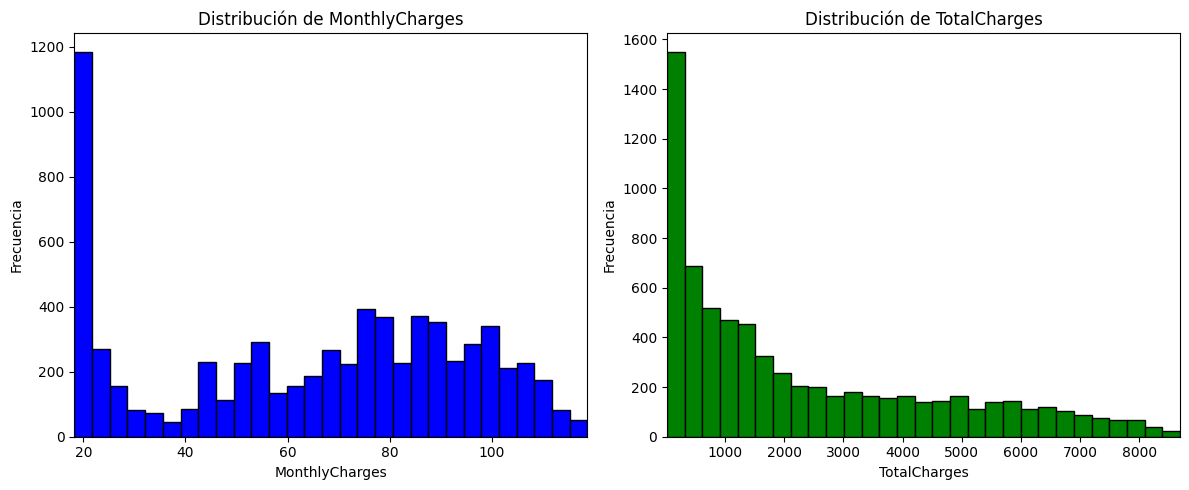

In [58]:
print("Valor maximo de renta total",contract['TotalCharges'].max())
print("Valor minimo de renta total",contract['TotalCharges'].min())
print("Valor maximo de renta mensual",contract['MonthlyCharges'].max())
print("Valor minimo de renta mensual",contract['MonthlyCharges'].min())
# Convert 'TotalCharges' to numeric if needed
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

# Create histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for MonthlyCharges
axs[0].hist(contract['MonthlyCharges'],bins=np.linspace(18.25, 118.75, 30), color='blue', edgecolor='black')
axs[0].set_title('Distribución de MonthlyCharges')
axs[0].set_xlabel('MonthlyCharges')
axs[0].set_ylabel('Frecuencia')
axs[0].set_xlim(18.25, 118.75)

# Histogram for TotalCharges
axs[1].hist(contract['TotalCharges'], bins=np.linspace(18.8, 8684.8, 30), color='green', edgecolor='black')
axs[1].set_title('Distribución de TotalCharges')
axs[1].set_xlabel('TotalCharges')
axs[1].set_ylabel('Frecuencia')
axs[1].set_xlim(18.8, 8684.8)

plt.tight_layout()
plt.show()


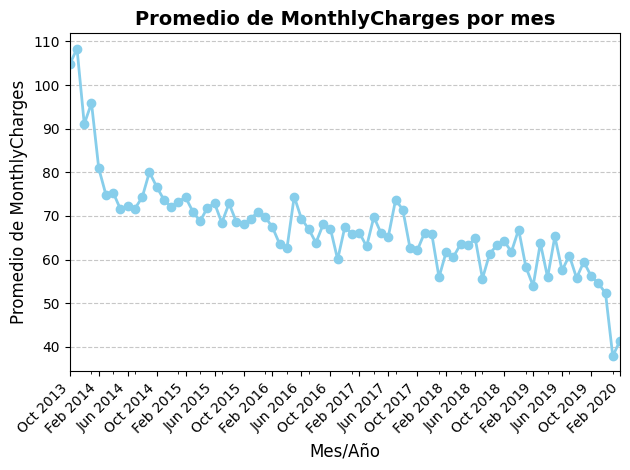

In [70]:
# Crear una columna con el mes y el año de la columna 'BeginDate'
contract['YearMonth'] = contract['BeginDate'].dt.to_period('M')

# Agrupar los datos por mes y calcular la media de MonthlyCharges para cada mes
monthly_charges_by_month = contract.groupby('YearMonth')['MonthlyCharges'].mean()
ax = monthly_charges_by_month.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)

# Etiquetas y título
ax.set_title('Promedio de MonthlyCharges por mes', fontsize=14, fontweight='bold')
ax.set_xlabel('Mes/Año', fontsize=12)
ax.set_ylabel('Promedio de MonthlyCharges', fontsize=12)

# Mostrar solo las etiquetas de cada 4 meses en el eje X
ticks = monthly_charges_by_month.index[::4]  # Seleccionar cada 4 meses
ax.set_xticks(ticks)
ax.set_xticklabels(monthly_charges_by_month.index[::4].strftime('%b %Y'), rotation=45, ha='right')

# Agregar líneas de cuadrícula horizontales para mayor claridad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mejorar el espaciado
plt.tight_layout()
plt.show()

Creare una nueva columna llamada x para cuando enddate sea 'No' sea 0 y cuando tenga fecha sea 1 

In [73]:
contract['EndDate_status'] = contract['EndDate'].apply(lambda x: 1 if x != 'No' else 0)
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,YearMonth,EndDate_status
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,2020-01,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,2017-04,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-10,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,2016-05,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-09,1


In [74]:
# Ver la cantidad de contratos cancelados vs. activos
print(contract['EndDate_status'].value_counts())

EndDate_status
0    5174
1    1869
Name: count, dtype: int64


C:\Users\HL4ev\AppData\Local\Temp\ipykernel_15608\3298592418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EndDate_status', y='MonthlyCharges', data=contract, palette='Set2')


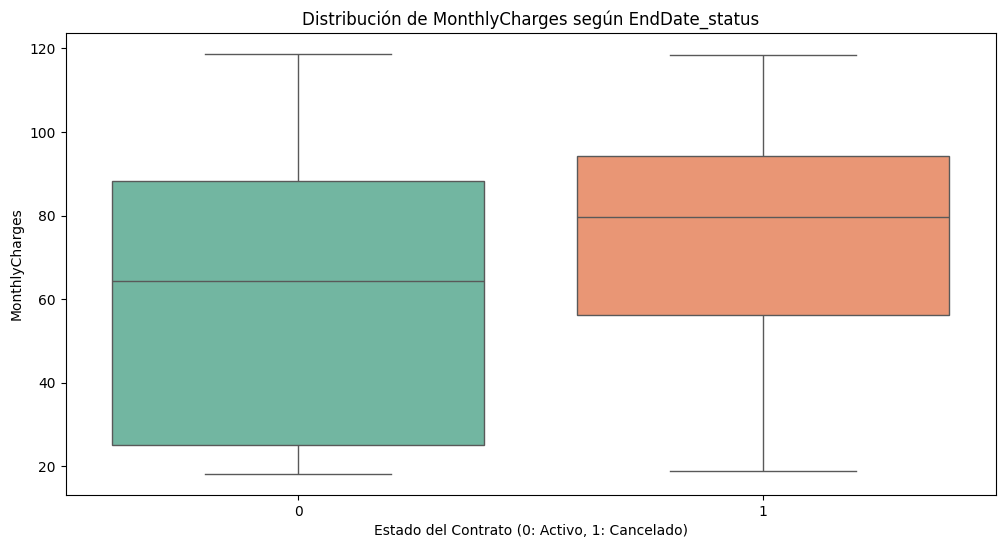

C:\Users\HL4ev\AppData\Local\Temp\ipykernel_15608\3298592418.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EndDate_status', y='TotalCharges', data=contract, palette='Set2')


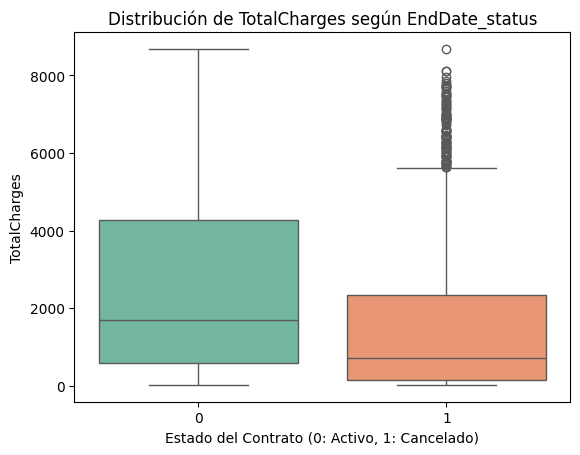

In [77]:
# Visualizar la distribución de MonthlyCharges y TotalCharges para contratos activos y cancelados
plt.figure(figsize=(12, 6))

# Gráfico de MonthlyCharges por EndDate_status
sns.boxplot(x='EndDate_status', y='MonthlyCharges', data=contract, palette='Set2')
plt.title('Distribución de MonthlyCharges según EndDate_status')
plt.xlabel('Estado del Contrato (0: Activo, 1: Cancelado)')
plt.ylabel('MonthlyCharges')
plt.show()

# Gráfico de TotalCharges por EndDate_status
sns.boxplot(x='EndDate_status', y='TotalCharges', data=contract, palette='Set2')
plt.title('Distribución de TotalCharges según EndDate_status')
plt.xlabel('Estado del Contrato (0: Activo, 1: Cancelado)')
plt.ylabel('TotalCharges')
plt.show()

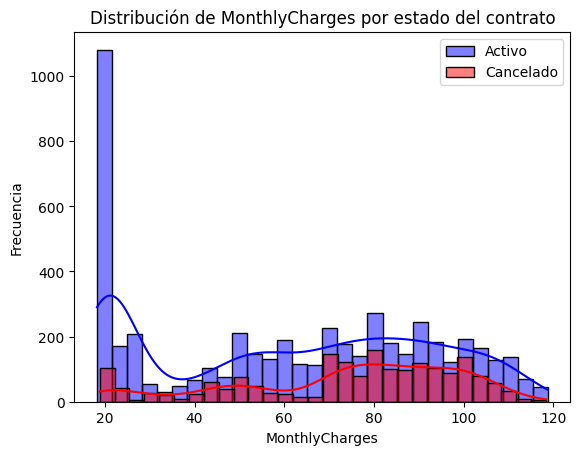

In [80]:
sns.histplot(contract[contract['EndDate_status'] == 0]['MonthlyCharges'], kde=True, label='Activo', color='blue', bins=30)
sns.histplot(contract[contract['EndDate_status'] == 1]['MonthlyCharges'], kde=True, label='Cancelado', color='red', bins=30)
plt.legend()
plt.title('Distribución de MonthlyCharges por estado del contrato')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.show()


Plan de Trabajo para Continuar con el Proyecto
Preguntas Aclaratorias:
¿Qué características adicionales pueden influir en la cancelación de contratos?

Aparte de las características que ya has analizado (como los cargos mensuales y totales), ¿hay otros servicios específicos que están asociados con la cancelación de contratos (por ejemplo, StreamingTV, SoporteTécnico, etc.)?

¿La disminución en los cargos mensuales está relacionada con el tipo de contrato o el tiempo del servicio?

Dado que observamos que los cargos han ido disminuyendo con el tiempo, ¿esto podría estar relacionado con contratos a largo plazo o con descuentos aplicados a clientes más antiguos?

¿Cómo impactan los outliers de TotalCharges en el análisis de la tasa de cancelación?

Es importante entender cómo los outliers de TotalCharges podrían estar afectando la tasa de cancelación. ¿Deberíamos eliminarlos o analizarlos por separado?

Plan Aproximado para Resolver la Tarea:
Análisis de Outliers en TotalCharges:

Dado que identificaste outliers en la columna TotalCharges para contratos finalizados, el primer paso será determinar si estos outliers deben ser tratados. Puedes explorar más a fondo si están relacionados con clientes de alto valor o si corresponden a errores en los datos.

Acción: Analizar la naturaleza de los outliers en TotalCharges. Si son legítimos, podrían ser clientes con servicios más caros que tienen un mayor valor total, y esto podría estar relacionado con una menor probabilidad de cancelación.

Segmentación y Comparación de Clientes:

Se recomienda segmentar a los clientes en diferentes grupos según características clave como tipo de contrato (1 año vs 2 años), tipo de servicio (telefonía vs internet), y si han contratado servicios adicionales como StreamingTV o SoporteTécnico.

Acción: Analizar la tasa de cancelación (EndDate_status) en función de estas características segmentadas. Esto ayudará a identificar patrones y grupos de clientes más propensos a cancelar su contrato.

Análisis Temporal de la Cancelación de Contratos:

Has observado que los cargos mensuales han disminuido con el tiempo, lo cual podría estar relacionado con contratos de larga duración o descuentos.

Acción: Realizar un análisis temporal de la tasa de cancelación utilizando la columna BeginDate. Esto ayudará a identificar tendencias estacionales o cambios en la tasa de cancelación a lo largo del tiempo.

Ingeniería de Características para el Modelado Predictivo:

Para construir un modelo predictivo de cancelación de contratos, deberás generar características adicionales, como la duración del contrato (calculada a partir de BeginDate y EndDate) y la cantidad de servicios adicionales contratados.

Acción: Crear nuevas columnas para representar características relevantes, como la duración del contrato y la cantidad de servicios adicionales (por ejemplo, StreamingTV, SoporteTécnico, etc.). Esto enriquecerá el conjunto de datos para un futuro modelo de predicción.

Preparación para el Modelado Predictivo:

Con las variables relevantes identificadas y las características generadas, puedes proceder a entrenar un modelo predictivo para predecir la tasa de cancelación de contratos.

Acción: Preparar los datos para el modelado, asegurándose de que todas las variables categóricas estén transformadas adecuadamente (por ejemplo, usando One-Hot Encoding) y que los datos estén listos para ser utilizados en modelos como regresión logística, árboles de decisión, etc.

Resumen de los Resultados del EDA:
Datos Limpiados:

No se encontraron valores nulos ni duplicados.

La columna BeginDate fue convertida a tipo datetime, y se creó la columna EndDate_status para clasificar los contratos como activos (0) o finalizados (1).

Distribuciones de MonthlyCharges y TotalCharges:

Ambas columnas presentan distribuciones sesgadas hacia la izquierda, lo que indica que la mayoría de los clientes tienen cargos relativamente bajos.

Análisis Temporal:

Se observó que los cargos mensuales han disminuido con el tiempo, lo que podría estar relacionado con descuentos o promociones para contratos más largos.

Outliers en TotalCharges:

Se encontraron outliers en los contratos finalizados, lo que sugiere que algunos clientes tienen un valor total muy alto. Esto debería investigarse más a fondo para entender su impacto en la cancelación de contratos.

Próximos Pasos:
Investigar más sobre los outliers de TotalCharges.

Segmentar a los clientes y comparar la tasa de cancelación entre diferentes grupos.

Realizar un análisis temporal de la cancelación de contratos.

Generar nuevas características para el modelado predictivo.

Preparar el conjunto de datos para entrenar un modelo predictivo.